In [708]:
import pandas as pd

# CSV 파일 불러오기
file1 = pd.read_csv("test.csv")
file2 = pd.read_csv("train.csv")

# 데이터 확인
file1.head(), file2.head()


(   PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  ,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4

In [709]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [710]:
file1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [711]:
file2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

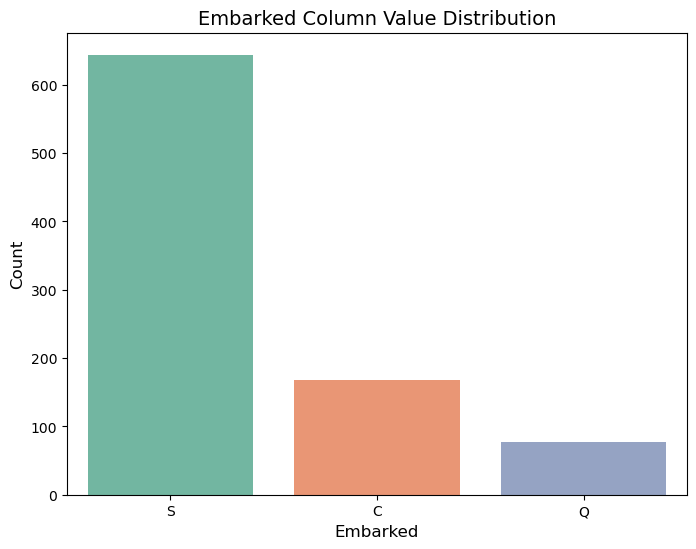

In [712]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Embarked 값들의 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=file2, palette='Set2', hue='Embarked', legend=False)

# 그래프 제목 추가
plt.title('Embarked Column Value Distribution', fontsize=14)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프 출력
plt.show()


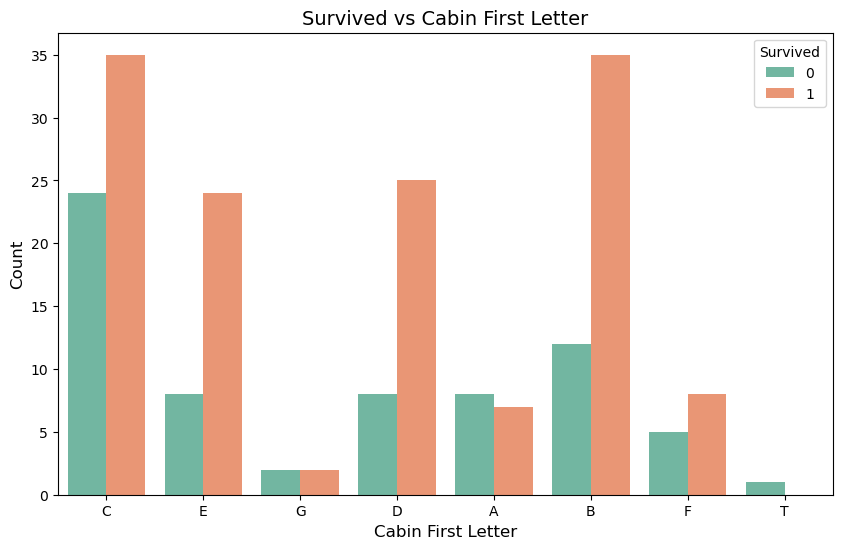

In [713]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cabin의 첫 글자만 추출하여 새로운 열 생성
file2['Cabin_first'] = file2['Cabin'].str[0]

# Cabin_first에서 결측치가 아닌 값들만 대상으로 처리
file2.loc[file2['Cabin_first'].notna(), 'Cabin_first'] = file2.loc[file2['Cabin_first'].notna(), 'Cabin_first'].fillna('U')

# Survived와 Cabin_first 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin_first', hue='Survived', data=file2, palette='Set2')

# 그래프 제목 추가
plt.title('Survived vs Cabin First Letter', fontsize=14)
plt.xlabel('Cabin First Letter', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프 출력
plt.show()


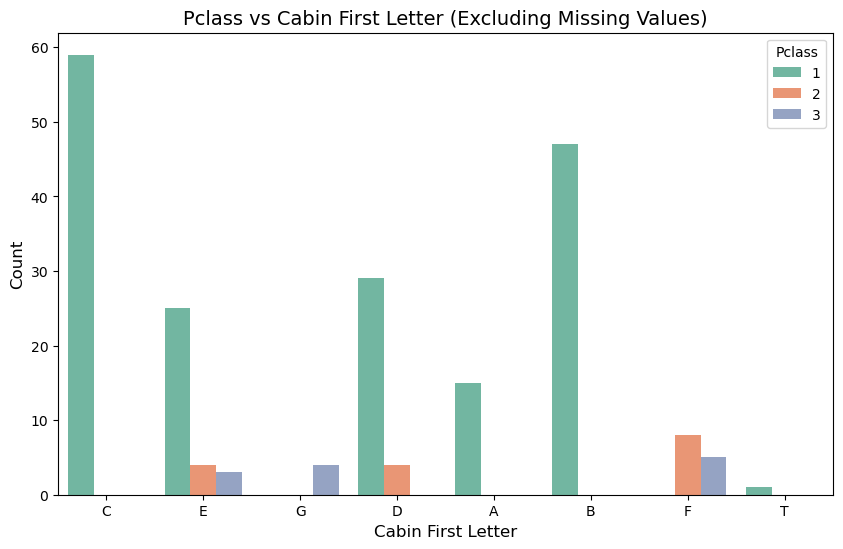

In [714]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cabin_first에서 결측치를 제외한 값들만 선택
file2_non_null = file2[file2['Cabin_first'].notna()]

# Survived와 Cabin_first 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin_first', hue='Pclass', data=file2_non_null, palette='Set2')

# 그래프 제목 추가
plt.title('Pclass vs Cabin First Letter (Excluding Missing Values)', fontsize=14)
plt.xlabel('Cabin First Letter', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프 출력
plt.show()


In [715]:
import pandas as pd

# 'Cabin_first' 열에서 첫 글자가 'T'인 행들만 필터링
t_cabin_fare = file2[file2['Cabin_first'] == 'T']['Fare']

# 'T'인 행들의 Fare 값 출력
print(t_cabin_fare)


339    35.5
Name: Fare, dtype: float64


In [716]:
# Fare 열의 평균값 계산
average_fare = file2['Fare'].mean()

# 평균값 출력
print("Fare 평균값:", average_fare)


Fare 평균값: 32.204207968574636


In [717]:
# Cabin_first 열에서 'T'가 포함된 모든 행 필터링
t_cabin_rows = file2[file2['Cabin_first'].str.contains('T', na=False)]

# 'T'가 포함된 행 출력
print(t_cabin_rows)


     PassengerId  Survived  Pclass                          Name   Sex   Age  \
339          340         0       1  Blackwell, Mr. Stephen Weart  male  45.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked Cabin_first  
339      0      0  113784  35.5     T        S           T  


In [718]:
# 'Cabin' 열 삭제
file2 = file2.drop(columns=['Cabin'])

# 삭제된 결과 출력 (선택 사항)
print(file2.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked Cabin_first  
0      0         A/5 21171   7.2500        S         NaN  
1      0          PC 17599  71.2833        C           C  
2      0  STON/O2. 3101282   7.9250        S         NaN  
3      0            113803  53.1000        S           C  
4      0            37345

In [719]:
# 'Embarked' 열의 결측치를 최빈값 'S'로 대체
file2['Embarked'] = file2['Embarked'].fillna('S')

# 대체된 결과 출력 (선택 사항)
print(file2['Embarked'].isna().sum())  # 결측치가 0개인지 확인


0


In [720]:
# 'Age' 열에서 결측치를 제거한 데이터
file2_no_missing_age = file2.dropna(subset=['Age'])

# Pclass별 Age의 평균값 계산 (결측치를 제거한 데이터 기준)
age_mean_by_pclass = file2_no_missing_age.groupby('Pclass')['Age'].mean()

# 각 Pclass별 Age 평균 출력
print(age_mean_by_pclass)


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [721]:
import pandas as pd

# 'Sex' 컬럼을 숫자로 변환 (male=0, female=1)
file2['Sex_numeric'] = file2['Sex'].map({'male': 0, 'female': 1})

# 'Age'와 'Sex_numeric' 간의 상관계수 계산
correlation = file2[['Age', 'Sex_numeric']].corr()

# 상관계수 출력
print(correlation)


                  Age  Sex_numeric
Age          1.000000    -0.093254
Sex_numeric -0.093254     1.000000


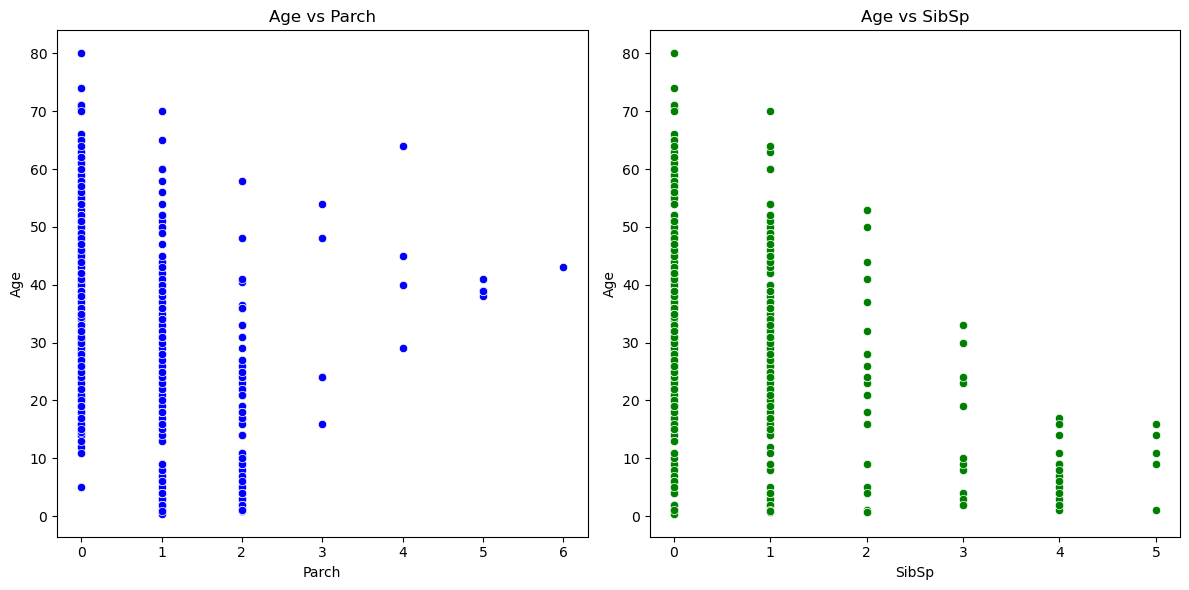

In [722]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# Parch와 Age의 관계 시각화
plt.subplot(1, 2, 1)
sns.scatterplot(x='Parch', y='Age', data=file2, color='blue')
plt.title('Age vs Parch')
plt.xlabel('Parch')
plt.ylabel('Age')

# SibSp와 Age의 관계 시각화
plt.subplot(1, 2, 2)
sns.scatterplot(x='SibSp', y='Age', data=file2, color='green')
plt.title('Age vs SibSp')
plt.xlabel('SibSp')
plt.ylabel('Age')

# 그래프 출력
plt.tight_layout()
plt.show()


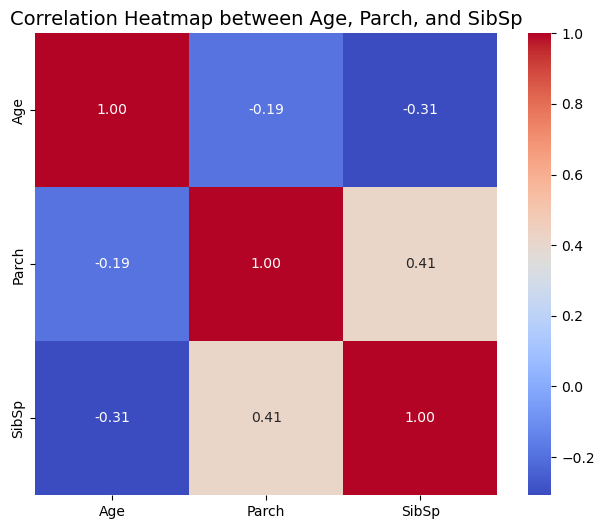

In [723]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parch, SibSp, Age 컬럼만 추출
corr_data = file2[['Age', 'Parch', 'SibSp']]

# 상관계수 계산
correlation_matrix = corr_data.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# 그래프 제목 추가
plt.title('Correlation Heatmap between Age, Parch, and SibSp', fontsize=14)

# 그래프 출력
plt.show()


In [724]:
# Parch, SibSp, Age 컬럼만 추출
corr_data = file2[['Age', 'Parch', 'SibSp']]

# 상관계수 계산
correlation_matrix = corr_data.corr()

# 상관계수 출력
print(correlation_matrix)


            Age     Parch     SibSp
Age    1.000000 -0.189119 -0.308247
Parch -0.189119  1.000000  0.414838
SibSp -0.308247  0.414838  1.000000


In [725]:
# Parch와 SibSp 컬럼을 합쳐서 Family 컬럼 만들기
file2['Family'] = file2['Parch'] + file2['SibSp']

# 결과 확인
print(file2[['Parch', 'SibSp', 'Family']].head())


   Parch  SibSp  Family
0      0      1       1
1      0      1       1
2      0      0       0
3      0      1       1
4      0      0       0


In [726]:
# Family와 Age 간의 상관계수 계산
correlation = file2[['Family', 'Age']].corr()

# 상관계수 출력
print(correlation)


          Family       Age
Family  1.000000 -0.301914
Age    -0.301914  1.000000


In [727]:
# 슬라이싱 후, 명시적으로 복사본을 만들기
data = file2[['Pclass', 'Family', 'Age']].copy()

# 결측치가 있는 행을 제거
data.dropna(subset=['Age'], inplace=True)

# 확인
print(data.head())


   Pclass  Family   Age
0       3       1  22.0
1       1       1  38.0
2       3       0  26.0
3       1       1  35.0
4       3       0  35.0


In [728]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 필요한 컬럼만 추출하고, 결측치가 있는 행 제거
data = file2[['Pclass', 'Family', 'Age']].copy()
data.dropna(subset=['Age'], inplace=True)

# 독립 변수(X)와 종속 변수(y) 분리
X = data[['Pclass', 'Family']]  # Pclass와 Family가 독립 변수
y = data['Age']  # Age가 종속 변수

# 훈련 세트와 테스트 세트로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성
model = LinearRegression()

# 훈련 데이터로 모델 학습
model.fit(X_train, y_train)

# 테스트 세트를 이용해 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차 (MSE)
r2 = r2_score(y_test, y_pred)  # 결정 계수 (R²)

# 평가 결과 출력
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 136.39798586267852
R² Score: 0.26432095199669003


In [729]:
import numpy as np

# 예측값과 실제값의 차이를 계산
error = np.abs(y_test - y_pred)

# 예측값과 실제값의 차이가 1 이하인 경우를 정확한 예측으로 간주
correct_predictions = np.sum(error <= 1)

# 전체 테스트 데이터에서 정확한 예측의 비율(정확도) 계산
accuracy = correct_predictions / len(y_test)

# 결과 출력
print(f"Accuracy (with error <= 1): {accuracy * 100:.2f}%")


Accuracy (with error <= 1): 6.99%


In [730]:
# Pclass별로 Age 결측치 개수 계산
age_missing_by_pclass = file2[file2['Age'].isna()].groupby('Pclass').size()

# Pclass별로 Age 결측치 비율 계산
age_missing_ratio_by_pclass = age_missing_by_pclass / file2.groupby('Pclass').size()

# 결과 출력
print("Pclass별 Age 결측치 개수:")
print(age_missing_by_pclass)

print("\nPclass별 Age 결측치 비율:")
print(age_missing_ratio_by_pclass)


Pclass별 Age 결측치 개수:
Pclass
1     30
2     11
3    136
dtype: int64

Pclass별 Age 결측치 비율:
Pclass
1    0.138889
2    0.059783
3    0.276986
dtype: float64


In [731]:
# Pclass별로 Age의 평균값 계산
age_mean_by_pclass = file2.groupby('Pclass')['Age'].mean()

# 결과 출력
print("Pclass별 Age의 평균값:")
print(age_mean_by_pclass)


Pclass별 Age의 평균값:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [732]:
# Pclass별 Age 평균값을 구한 후 결측치를 해당 Pclass의 평균값으로 대체
file2['Age'] = file2.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

# 결과 확인
print(file2[['Pclass', 'Age']].head())


   Pclass   Age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0


In [733]:
# 각 컬럼별 결측치 개수 출력
missing_values = file2.isna().sum()

# 결측치가 있는 컬럼만 필터링하여 출력
print("전체 컬럼에 대한 결측치 개수:")
print(missing_values)


전체 컬럼에 대한 결측치 개수:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Cabin_first    687
Sex_numeric      0
Family           0
dtype: int64


In [734]:
# 각 컬럼의 데이터 타입 확인
categorical_columns = file2.select_dtypes(include=['object', 'category']).columns

# 범주형 변수 출력
print("범주형 변수:")
print(categorical_columns)


범주형 변수:
Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Cabin_first'], dtype='object')


In [735]:
file2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_first,Sex_numeric,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,0,0


In [736]:
# PassengerId, Name, Ticket 컬럼 제거
file2.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# 결과 확인
print(file2.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Cabin_first  \
0         0       3    male  22.0      1      0   7.2500        S         NaN   
1         1       1  female  38.0      1      0  71.2833        C           C   
2         1       3  female  26.0      0      0   7.9250        S         NaN   
3         1       1  female  35.0      1      0  53.1000        S           C   
4         0       3    male  35.0      0      0   8.0500        S         NaN   

   Sex_numeric  Family  
0            0       1  
1            1       1  
2            1       0  
3            1       1  
4            0       0  


In [737]:
file2 = file2.drop(columns = ['Fare','Sex_numeric'])

In [738]:
print(file2.head())

   Survived  Pclass     Sex   Age  SibSp  Parch Embarked Cabin_first  Family
0         0       3    male  22.0      1      0        S         NaN       1
1         1       1  female  38.0      1      0        C           C       1
2         1       3  female  26.0      0      0        S         NaN       0
3         1       1  female  35.0      1      0        S           C       1
4         0       3    male  35.0      0      0        S         NaN       0


In [739]:
file2 = file2.drop(columns = ['Cabin_first'])

In [740]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sex 컬럼 - Label Encoding
label_encoder = LabelEncoder()
file2['Sex'] = label_encoder.fit_transform(file2['Sex'])  # male → 0, female → 1

# Embarked 컬럼 - One-Hot Encoding (0과 1로 변환)
file2 = pd.get_dummies(file2, columns=['Embarked']).astype(int)

print(file2.head())  # 변환된 데이터 확인


   Survived  Pclass  Sex  Age  SibSp  Parch  Family  Embarked_C  Embarked_Q  \
0         0       3    1   22      1      0       1           0           0   
1         1       1    0   38      1      0       1           1           0   
2         1       3    0   26      0      0       0           0           0   
3         1       1    0   35      1      0       1           0           0   
4         0       3    1   35      0      0       0           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [741]:
print(file2.head())

   Survived  Pclass  Sex  Age  SibSp  Parch  Family  Embarked_C  Embarked_Q  \
0         0       3    1   22      1      0       1           0           0   
1         1       1    0   38      1      0       1           1           0   
2         1       3    0   26      0      0       0           0           0   
3         1       1    0   35      1      0       1           0           0   
4         0       3    1   35      0      0       0           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [742]:
file2 = file2.drop(columns = ['Parch', 'SibSp'])

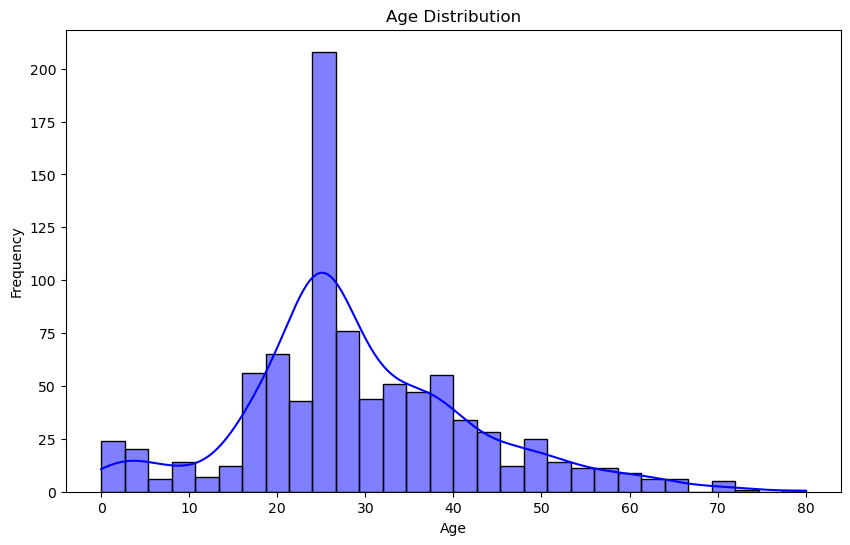

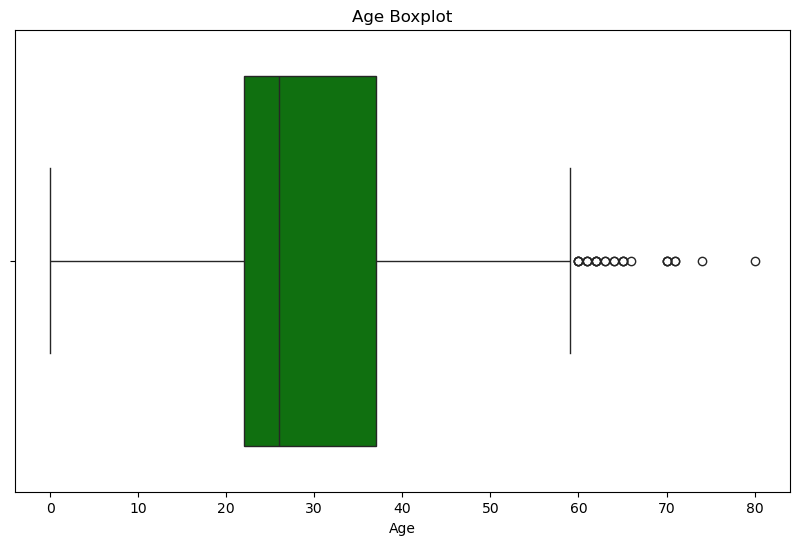

In [743]:
import matplotlib.pyplot as plt
import seaborn as sns

# 나이 컬럼의 분포 확인 - 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(file2['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 나이 컬럼의 이상치 확인 - 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x=file2['Age'], color='green')
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()


In [744]:
# 나이(Age) 컬럼에 대한 기술 통계 출력
age_stats = file2['Age'].describe()

# IQR 계산
Q1 = file2['Age'].quantile(0.25)
Q3 = file2['Age'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 (하한, 상한) 출력
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 결과 출력
print("Age Statistics:")
print(age_stats)
print("\nIQR Calculation:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Age Statistics:
count    891.000000
mean      29.236813
std       13.220219
min        0.000000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

IQR Calculation:
Q1: 22.0, Q3: 37.0, IQR: 15.0
Lower Bound: -0.5, Upper Bound: 59.5


In [745]:
# Age 컬럼에서 0인 값만 평균값으로 대체
mean_age = file2['Age'].mean()
file2['Age'] = file2['Age'].replace(0, mean_age)

# 결과 확인
print(file2['Age'].describe())


count    891.000000
mean      29.466507
std       12.961416
min        1.000000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


In [746]:
file2.head()

,Survived,Pclass,Sex,Age,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,1
1,1,1,0,38.0,1,1,0,0
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,0,1


In [747]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 나이에 대해서만 표준화 적용
file2['Age'] = scaler.fit_transform(file2[['Age']])

# 결과 확인
print(file2['Age'].describe())


count    8.910000e+02
mean     9.569599e-17
std      1.000562e+00
min     -2.197483e+00
25%     -5.763800e-01
50%     -2.675984e-01
75%      5.815510e-01
max      3.900953e+00
Name: Age, dtype: float64


Age Skewness: 0.5783834934172787


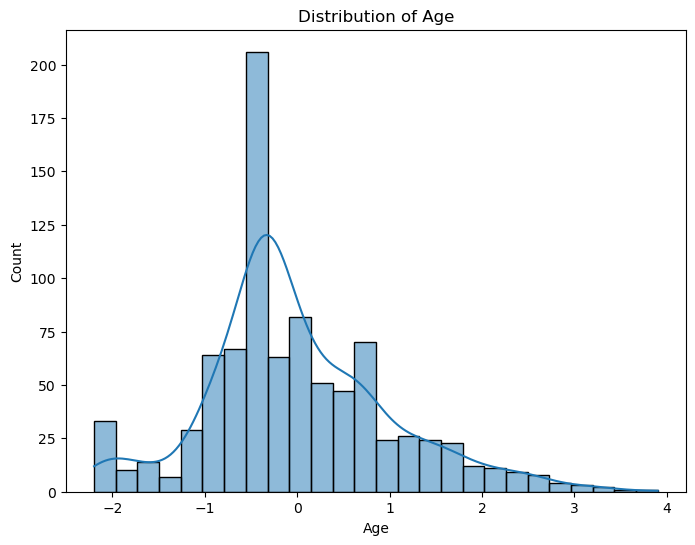

In [748]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

# Age 변수의 왜도 계산
age_skew = skew(file2['Age'].dropna())  # NaN 값 제거 후 왜도 계산
print(f"Age Skewness: {age_skew}")

# Age 변수의 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(file2['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()


In [749]:
# 결측치 확인
missing_values = file2.isnull().sum()

# 결측치가 있는 컬럼만 출력
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [750]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Family      891 non-null    int64  
 5   Embarked_C  891 non-null    int64  
 6   Embarked_Q  891 non-null    int64  
 7   Embarked_S  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [751]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [752]:
# X는 피처 데이터 (Pclass, Age, Family, Embarked), y는 타겟 데이터 (Survived)
X = file2[['Pclass', 'Age', 'Family', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = file2['Survived']

# 데이터 나누기: 훈련 데이터 80%, 테스트 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화: Age와 Family 같은 특성 값의 차이가 클 수 있으므로 표준화 진행
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [753]:
# 모델 초기화
model = LogisticRegression(max_iter=1000)

# 모델 훈련
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 리포트 출력 (정밀도, 재현율, F1 점수 등)
print(classification_report(y_test, y_pred))


Accuracy: 0.7263
              precision    recall  f1-score   support

           0       0.72      0.89      0.79       105
           1       0.76      0.50      0.60        74

    accuracy                           0.73       179
   macro avg       0.74      0.69      0.70       179
weighted avg       0.73      0.73      0.71       179



In [754]:
from sklearn.model_selection import cross_val_score

# K-Fold Cross Validation 적용 (5-fold)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# 교차 검증 결과 출력
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean():.4f}')


Cross-Validation Scores: [0.67132867 0.71328671 0.71126761 0.70422535 0.66901408]
Mean Cross-Validation Score: 0.6938


In [755]:
# 기존 코드에 랜덤 포레스트와 그라디언트 부스팅 모델을 추가

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# file2에서 데이터 로드 (변수명이 다르게 설정됨)
X = file2[['Pclass', 'Age', 'Family', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]  # 피처들
y = file2['Survived']  # 타겟

# 데이터 스케일링 (특히 Age와 Family가 다른 단위일 경우)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. 로지스틱 회귀 (Logistic Regression)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_cv_scores = cross_val_score(log_model, X_scaled, y, cv=5)
print(f'Logistic Regression Cross-Validation Scores: {log_cv_scores}')
print(f'Mean Logistic Regression Cross-Validation Score: {log_cv_scores.mean()}')

# 2. 랜덤 포레스트 (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f'Random Forest Cross-Validation Scores: {rf_cv_scores}')
print(f'Mean Random Forest Cross-Validation Score: {rf_cv_scores.mean()}')

# 3. 그라디언트 부스팅 (Gradient Boosting)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_cv_scores = cross_val_score(gb_model, X_scaled, y, cv=5)
print(f'Gradient Boosting Cross-Validation Scores: {gb_cv_scores}')
print(f'Mean Gradient Boosting Cross-Validation Score: {gb_cv_scores.mean()}')



Logistic Regression Cross-Validation Scores: [0.62011173 0.66292135 0.73595506 0.75280899 0.69662921]
Mean Logistic Regression Cross-Validation Score: 0.6936852677170295
Random Forest Cross-Validation Scores: [0.62011173 0.65168539 0.65168539 0.70224719 0.66292135]
Mean Random Forest Cross-Validation Score: 0.6577302115372544
Gradient Boosting Cross-Validation Scores: [0.63128492 0.71910112 0.73595506 0.7752809  0.73595506]
Mean Gradient Boosting Cross-Validation Score: 0.7195154102065155


In [756]:
file1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [757]:
file1 = file1.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'])

In [758]:
import pandas as pd
import numpy as np

# file1 데이터 전처리

# 1. Sex 컬럼 인코딩 (Male -> 0, Female -> 1)
file1['Sex'] = file1['Sex'].map({'male': 0, 'female': 1})

# 2. Age 결측치 처리 (평균값으로 대체)
file1['Age'] = file1['Age'].fillna(file1['Age'].mean())

# 3. Age 정규화 (0과 1 사이로 변환)
min_age = file1['Age'].min()
max_age = file1['Age'].max()
file1['Age'] = (file1['Age'] - min_age) / (max_age - min_age)

# 4. SibSp + Parch -> Family 컬럼 생성
file1['Family'] = file1['SibSp'] + file1['Parch']

# 5. Embarked 더미 변수 생성 (C, Q, S에 대해 각각 0과 1로 변환)
file1['Embarked_C'] = (file1['Embarked'] == 'C').astype(int)
file1['Embarked_Q'] = (file1['Embarked'] == 'Q').astype(int)
file1['Embarked_S'] = (file1['Embarked'] == 'S').astype(int)

# 6. Age 로그 변환 (0 이하의 값은 그대로 두고, 그 외 값은 로그 변환)
file1['Age'] = file1['Age'].apply(lambda x: x if x <= 0 else np.log(x))

# 결과 확인
print(file1.head())


   Pclass  Sex       Age  SibSp  Parch Embarked  Family  Embarked_C  \
0       3    0 -0.792474      0      0        Q       0           0   
1       3    1 -0.481970      1      0        S       1           0   
2       2    0 -0.204105      0      0        Q       0           0   
3       3    0 -1.038973      0      0        S       0           0   
4       3    1 -1.245209      1      1        S       2           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1  


In [759]:
file2.head()

,Survived,Pclass,Sex,Age,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.576380,1,0,0,1
1,1,1,0,0.658746,1,1,0,0
2,1,3,0,-0.267598,0,0,0,1
3,1,1,0,0.427160,1,0,0,1
4,0,3,1,0.427160,0,0,0,1


In [813]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# 이미 전처리된 file1을 사용한다고 가정

# 입력 변수 (Pclass, Age, Family, Embarked_C, Embarked_S, Embarked_Q)
X_file1 = file1[['Pclass', 'Age', 'Family', 'Embarked_C', 'Embarked_S', 'Embarked_Q']]

# 모델 훈련을 위해 file2에서 사용한 X와 y 준비
X_train = file2[['Pclass', 'Age', 'Family', 'Embarked_C', 'Embarked_S', 'Embarked_Q']]
y_train = file2['Survived']

# 모델 훈련 (GradientBoostingClassifier 사용)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# file1 데이터를 예측
predictions = model.predict(X_file1)

# 예측 결과를 'Survived' 컬럼으로 file1에 추가
file1['Survived'] = predictions

# 예측 결과 출력 (Survived가 0이면 사망, 1이면 생존)
print(file1[['Pclass', 'Age', 'Family', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Survived']].head())



   Pclass       Age  Family  Embarked_C  Embarked_S  Embarked_Q  Survived
0       3 -0.792474       0           0           0           1         0
1       3 -0.481970       1           0           1           0         0
2       2 -0.204105       0           0           0           1         1
3       3 -1.038973       0           0           1           0         0
4       3 -1.245209       2           0           1           0         0


In [815]:
survived_count = file1[file1['Survived'] == 1].shape[0]
print(f'생존자 수: {survived_count}명')

생존자 수: 198명


In [817]:
file3 = pd.read_csv("submission.csv")


In [819]:
survived_count1 = file3[file3['Survived'] == 1].shape[0]
print(f'생존자 수: {survived_count1}명')

생존자 수: 152명
